In [1]:
import yfinance as yf
import pandas as pd

tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="1y")

tesla_data.reset_index(inplace=True)

tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2024-04-17 00:00:00-04:00,157.639999,158.330002,153.779999,155.449997,82439700,0.0,0.0
1,2024-04-18 00:00:00-04:00,151.250000,152.199997,148.699997,149.929993,96098800,0.0,0.0
2,2024-04-19 00:00:00-04:00,148.970001,150.940002,146.220001,147.050003,86005100,0.0,0.0
3,2024-04-22 00:00:00-04:00,140.559998,144.440002,138.800003,142.050003,107097600,0.0,0.0
4,2024-04-23 00:00:00-04:00,143.330002,147.259995,141.110001,144.679993,124545100,0.0,0.0


In [17]:
!pip install yfinance
!pip install bs4
!pip install nbformat
!pip install --upgrade plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 104.8 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.24.1
    Uninstalling plotly-5.24.1:
      Successfully uninstalled plotly-5.24.1


In [20]:
#pregunta 2
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

headers = {"User-Agent": "Mozilla/5.0"}

response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")

tables = soup.find_all("table")
revenue_table = None

for table in tables:
    if "Quarterly Revenue" in table.text:
        revenue_table = table
        break

tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

for row in revenue_table.find_all("tr")[1:]:
    cols = row.find_all("td")
    if len(cols) == 2:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip().replace("$", "").replace(",", "")
        if revenue != "":
            tesla_revenue = pd.concat([tesla_revenue, pd.DataFrame([{"Date": date, "Revenue": revenue}])], ignore_index=True)

print(tesla_revenue.tail())


          Date Revenue
57  2010-09-30      31
58  2010-06-30      28
59  2010-03-31      21
60  2009-09-30      46
61  2009-06-30      27


In [1]:
#pregunta 3
import yfinance as yf
import pandas as pd

gme = yf.Ticker("GME")
gme_data = gme.history(period="1y")

gme_data.reset_index(inplace=True)

print(gme_data.head())


                       Date   Open   High    Low  Close   Volume  Dividends  \
0 2024-04-18 00:00:00-04:00  10.32  10.63  10.27  10.31  2175400        0.0   
1 2024-04-19 00:00:00-04:00  10.20  10.50  10.20  10.42  2455100        0.0   
2 2024-04-22 00:00:00-04:00  10.41  10.45  10.01  10.01  3261000        0.0   
3 2024-04-23 00:00:00-04:00  10.05  10.28  10.01  10.16  2511800        0.0   
4 2024-04-24 00:00:00-04:00  10.16  10.94  10.16  10.93  4829600        0.0   

   Stock Splits  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  


In [11]:
#preunta 4
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"

headers = {"User-Agent": "Mozilla/5.0"}

response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")

tables = soup.find_all("table")

revenue_table = None
for table in tables:
    if "Quarterly Revenue" in table.text:
        revenue_table = table
        break

gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

for row in revenue_table.find_all("tr")[1:]:
    cols = row.find_all("td")
    if len(cols) == 2:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip().replace("$", "").replace(",", "")
        if revenue != "":
            gme_revenue = pd.concat([gme_revenue, pd.DataFrame([{"Date": date, "Revenue": revenue}])], ignore_index=True)

print(gme_revenue.tail())


          Date Revenue
60  2010-01-31    3524
61  2009-10-31    1835
62  2009-07-31    1739
63  2009-04-30    1981
64  2009-01-31    3492


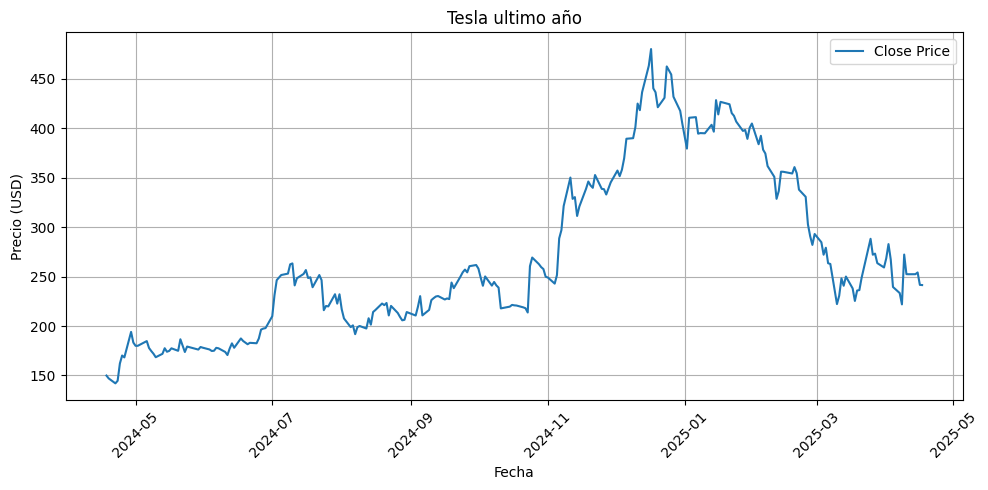

In [5]:
#pregunta 5
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd

tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="1y")
tesla_data.reset_index(inplace=True)

def make_graph(data, title):
    plt.figure(figsize=(10, 5))
    plt.plot(data['Date'], data['Close'], label='Close Price')
    plt.title(title)
    plt.xlabel('Fecha')
    plt.ylabel('Precio (USD)')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

make_graph(tesla_data, "Tesla ultimo año")


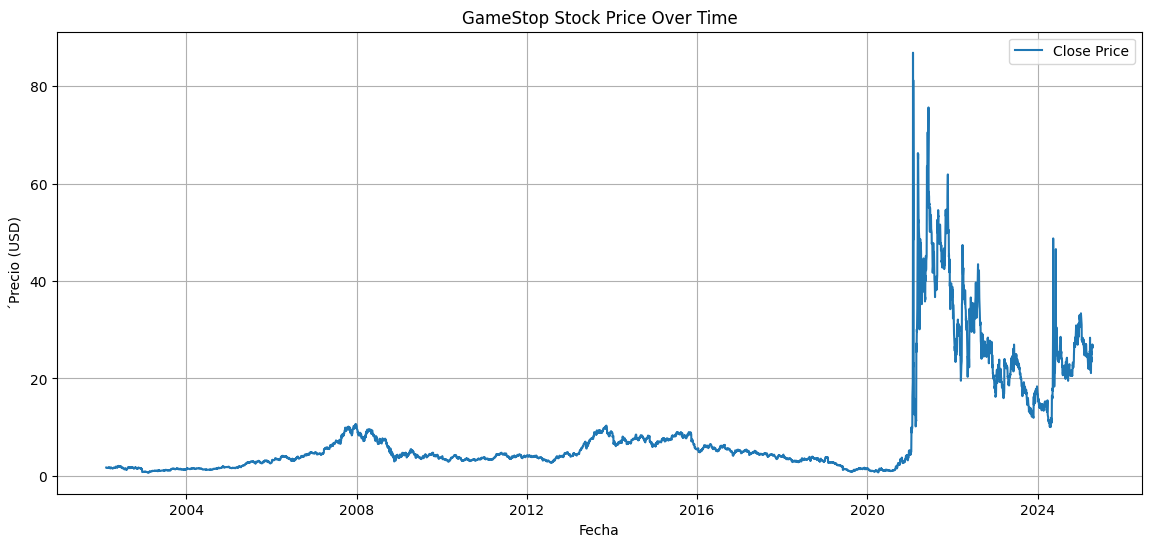

In [19]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

gme = yf.Ticker("GME")
gme_data = gme.history(period="max")


gme_data.reset_index(inplace=True)

def make_graph(data, title):
    plt.figure(figsize=(14, 6))
    plt.plot(data['Date'], data['Close'], label='Close Price')
    plt.xlabel('Fecha')
    plt.ylabel('´Precio (USD)')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

make_graph(gme_data, "GameStop Stock Price Over Time")